<a href="https://colab.research.google.com/github/RobertoContrerasM/IA-RCCM/blob/Master/Practica2Perceptr%C3%B3nMulCapFuenDdPer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práctica 2 - Perceptrón multicapa Fuente de datos personal**

DryBean

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LetterRecog(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.cost_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el dataset desde el archivo .txt
data = arff.loadarff('C:\Users\VRNK1\Downloads\DryBeanDataset\Dry_Bean_Dataset.arff')
df = pd.DataFrame(data[0])

# Revisar las primeras filas del dataset para entender su estructura
print(df.head())

# Seleccionar las primeras 100 filas para simplificar (características y etiquetas)
X = df.iloc[0:100, :-1].values  # Todas las columnas excepto la última que contiene la clase
y = df.iloc[0:100, -1].values  # La última columna contiene las clases de frijol

# Convertir las etiquetas (nombres de frijoles) en -1 y 1 (binary classification simplificada para este ejemplo)
# Etiquetamos un tipo de frijol como -1 y el resto como 1 (esto es solo un ejemplo, puedes ajustarlo según sea necesario)
y = np.where(y == 'Seker', 1, -1)

# Asegurarse de que X sea de tipo float64 para evitar errores
X = X.astype(np.float64)

# Entrenar el modelo
ppn = LetterRecog(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el costo
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del LetterRecog')
plt.show()

# Representación gráfica de dos atributos del dataset (seleccionamos dos columnas numéricas como ejemplo)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Seker')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='No Seker')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend(loc='upper left')
plt.title('Distribución de dos atributos')
plt.show()


Statlog (German Credit Data)

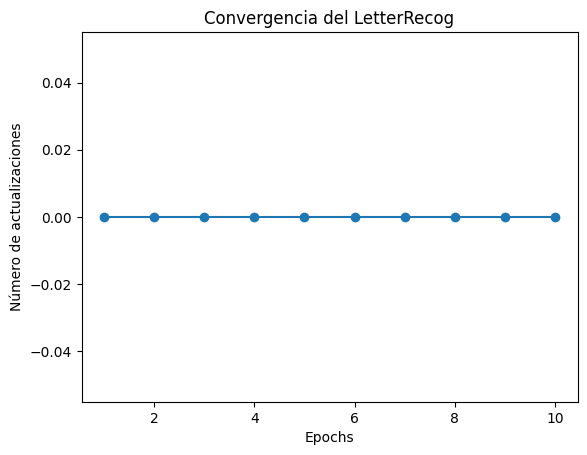

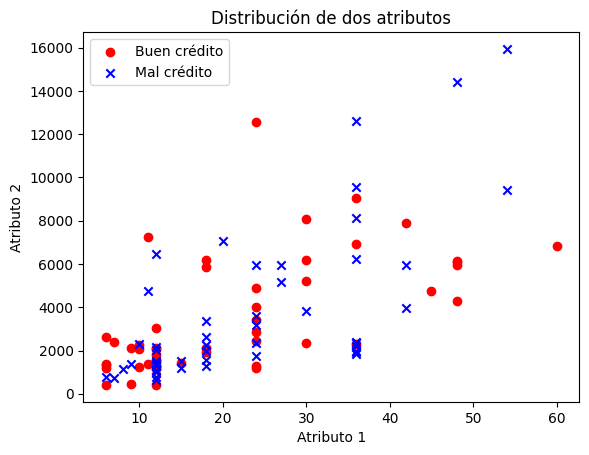

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LetterRecog(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.cost_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delim_whitespace=True, header=None)

# Seleccionar las primeras 100 filas (características y etiquetas)
X = df.iloc[0:100, 1:17]

# Identificar y convertir las columnas categóricas a variables numéricas
X = pd.get_dummies(X, drop_first=True)

# Convertir a valores flotantes para evitar errores
X = X.astype(np.float64)

# La columna 0 contiene las etiquetas (1 para buen crédito, 2 para mal crédito)
y = df.iloc[0:100, 0].values

# Convertir las etiquetas a -1 y 1 (1 = buen crédito, -1 = mal crédito)
y = np.where(y == 1, 1, -1)

# Entrenar el modelo
ppn = LetterRecog(eta=0.1, n_iter=10)
ppn.fit(X.values, y)

# Graficar el costo
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del LetterRecog')
plt.show()

# Representación gráfica de dos atributos del dataset (seleccionamos dos columnas numéricas como ejemplo)
plt.scatter(X.iloc[:50, 0], X.iloc[:50, 1], color='red', marker='o', label='Buen crédito')
plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1], color='blue', marker='x', label='Mal crédito')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend(loc='upper left')
plt.title('Distribución de dos atributos')
plt.show()



Human Activity Recognition Using Smartphones


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LetterRecog(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.cost_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar los datos de entrenamiento
X_train = pd.read_csv(r'Users/VRNK1/Descargas/UCI_HAR_Dataset/train/X_train', delim_whitespace=True, header=None)
y_train = pd.read_csv(r'C:\Users\VRNK1\Descargas\UCI_HAR_Dataset\train\y_train.txt', delim_whitespace=True, header=None)

# Seleccionar las primeras 100 filas para simplificar el proceso (para este ejemplo)
X = X_train.iloc[0:100, :].values
y = y_train.iloc[0:100, 0].values

# Convertir las etiquetas (las actividades) en -1 y 1 para clasificación binaria (ajusta según sea necesario)
y = np.where(y == 1, 1, -1)  # Etiquetamos actividad 1 como 1, y las demás como -1 para simplificación

# Asegurarse de que X sea de tipo float64
X = X.astype(np.float64)

# Entrenar el modelo
ppn = LetterRecog(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el costo
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del modelo LetterRecog')
plt.show()

# Representación gráfica de dos atributos (columnas) del dataset
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Actividad 1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='No Actividad 1')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend(loc='upper left')
plt.title('Distribución de dos atributos')
plt.show()

**Default of Credit Card Clients**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset en formato CSV
# Updated URL: Added '.data' extension
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00310/default%20of%20credit%20card%20clients.data'
df = pd.read_csv(url, header=1)  # Utilizamos

# Revisar las primeras filas del dataset
print(df.head())

# Seleccionar características y etiqueta
X = df.iloc[:, 1:-1].values  # Todas las columnas excepto la última que contiene la clase
y = df.iloc[:, -1].values     # La última columna contiene la clase (default o no)

# Convertir las etiquetas en -1 y 1 (ejemplo)
y = np.where(y == 1, 1, -1)  # Etiquetamos default como 1 y no default como -1

# Asegurarse de que X sea de tipo float64
X = X.astype(np.float64)

# Entrenar el modelo
ppn = LetterRecog(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el costo
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del modelo LetterRecog')
plt.show()

# Representación gráfica de dos atributos (columnas) del dataset
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Default')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='No Default')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend(loc='upper left')
plt.title('Distribución de dos atributos')
plt.show()